    age  blood_pressure  cholesterol symptom  disease_outcome
0  25.0           120.0        200.0       Y                0
1  30.0           130.0        220.0       N                1
2  35.0           140.0        240.0       Y                0
3  40.0           150.0        250.0       Y                1
4  45.0             NaN        260.0       N                0
5  50.0           160.0        270.0       Y                1
6   NaN           170.0        280.0       Y                1
7  60.0           180.0        290.0       N                0
8  65.0           190.0          NaN     NaN                1
9  70.0           200.0        310.0       Y                0


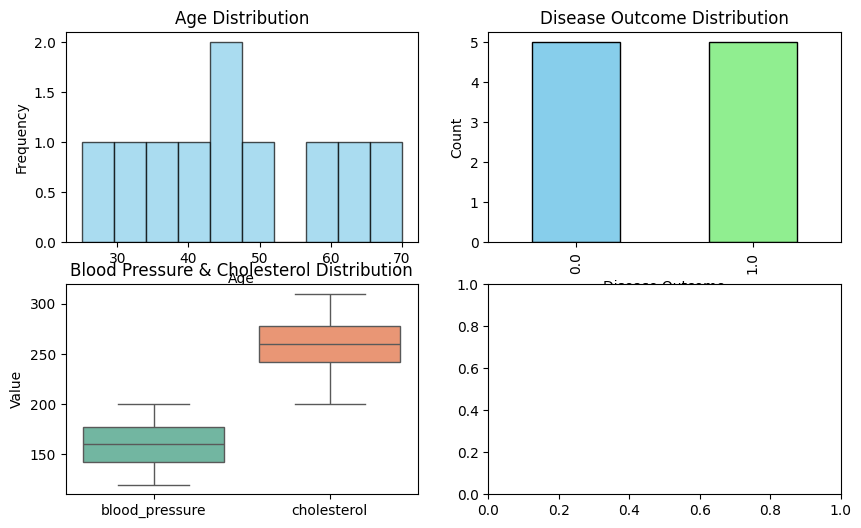

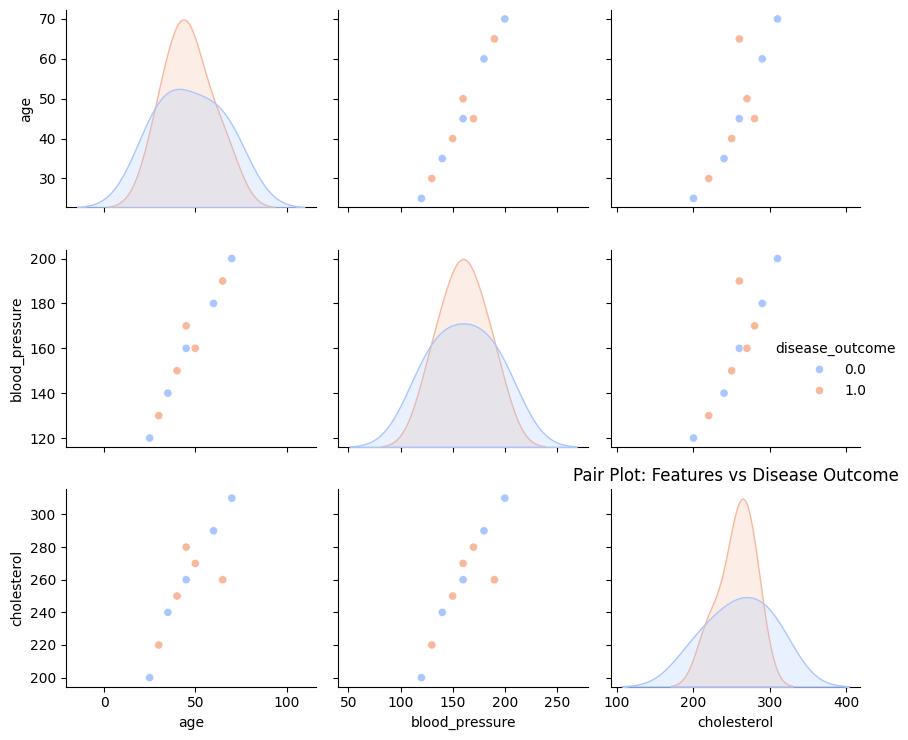

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer  # Importing SimpleImputer

# Create a dummy dataset
data = {
    'age': [25, 30, 35, 40, 45, 50, np.nan, 60, 65, 70],
    'blood_pressure': [120, 130, 140, 150, np.nan, 160, 170, 180, 190, 200],
    'cholesterol': [200, 220, 240, 250, 260, 270, 280, 290, np.nan, 310],
    'symptom': ['Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', np.nan, 'Y'],
    'disease_outcome': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # 0 = No disease, 1 = Disease
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the dummy data to a CSV file
df.to_csv('healthcare_data.csv', index=False)

# Preview the dataset
print(df)

# Data Cleaning: Handling missing values (as shown in the previous code)
# Impute numerical columns with the median value
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='median')  # Use SimpleImputer to handle missing data
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding categorical data

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Now we can create figures to visualize the cleaned dataset.

# Set up the plotting environment
plt.figure(figsize=(10, 6))

# 1. Histogram of numerical columns
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
df['age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Bar plot of disease_outcome distribution
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
df['disease_outcome'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Disease Outcome Distribution')
plt.xlabel('Disease Outcome')
plt.ylabel('Count')

# 3. Box plot of blood_pressure and cholesterol
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
sns.boxplot(data=df[['blood_pressure', 'cholesterol']], palette='Set2')
plt.title('Blood Pressure & Cholesterol Distribution')
plt.ylabel('Value')

# 4. Pair plot to visualize relationships between variables
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
sns.pairplot(df[['age', 'blood_pressure', 'cholesterol', 'disease_outcome']], hue='disease_outcome', palette='coolwarm')
plt.title('Pair Plot: Features vs Disease Outcome')

# Adjust layout for better spacing
plt.tight_layout()

# Show all the plots
plt.show()



